<a href="https://colab.research.google.com/github/shoulderhu/colab-tensorflow-ipy/blob/master/NTPU_01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the first coding segment of the NTPU DL course.

The objective of this sample code segment is to load the classic Fisher's Iris dataset, then perform **binary classification** to predict whether a newly observed Iris is an Iris setosa or not.

## Importing the Required Modules
First, we import **numpy** (for vector math) and **matplotlib.pyplot** (for visualization).

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Next, we import the Iris dataset from **scikit-learn**.

In [0]:
from sklearn.datasets import load_iris

Lastly, we import the **perceptron** model.

We can implement our own perceptron using tensorflow, or even just with numpy, but for the purposes of this lab, it is not necessary.

In [0]:
from sklearn.linear_model import Perceptron

## Preparing the Data

We begin by loading the dataset (which is stored in a class defined in scikit-learn) into **iris**, then print the description.

In [0]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

From the description, we can see that the **class correlation** of the petal length and width is very high. In other words, these two features can be thought of as defining features for an Iris flower. For the purposes of this simple demo, we will therefore only use the petal length and width for training and testing. 

Let's store the petal length and width into **X**. The ground truths (answers) are stored into **y_binary**, where a value of 1 indicates that the data point in question is a flower belonging to the **Iris setosa** class.

![Graphical representation of the input data](https://drive.google.com/uc?export=view&id=1ma4wyIboHfHMI4G6k8yjd3Fkf2SmS91N)

In [0]:
X = iris.data[:,(2,3)]
y_binary = (iris.target == 0).astype(np.int)

Let's draw this using **matplotlib** to see what the data points look like on a scatter plot.

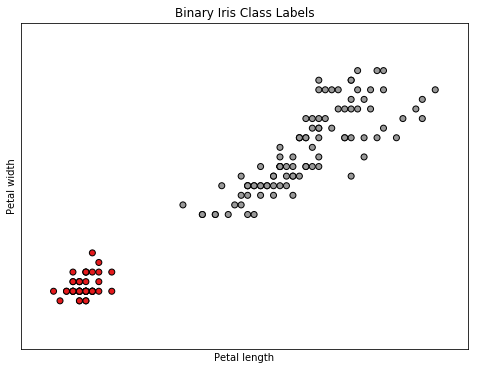

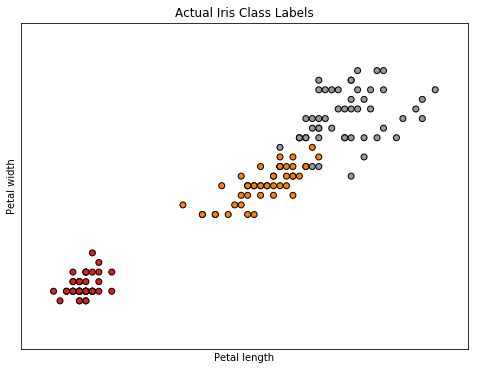

In [0]:
x_min, x_max = X[:,0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:, 1].max() + .5

# Binary classification figure
plt.figure(figsize=(8, 6))
plt.clf()

y_binary_temp = (y_binary == 0).astype(np.int)
plt.scatter(X[:, 0], X[:, 1], c=y_binary_temp, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Binary Iris Class Labels')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Actual three class figure
plt.figure(figsize=(8,6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Actual Iris Class Labels')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

## Training and Evaluating the Perceptron using Scikit-Learn

Let's train this with a perceptron to classify the data into the two classes "is Iris setosa" and "is not Iris setosa". This is surprisingly easy with scikit-learn, since the perceptron is a well-known model.

In [0]:
per_clf = Perceptron()
per_clf.fit(X, y_binary)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Now that the perceptron is trained, let's generate some random input to act as new observations (**test set**). Here, we use numpy to generate a normally distributed sample test set, where the variation/std and mean follow those of the actual setosa data samples. We then do the same for the other classes (veriscolor and virginica), and concatenate to form the full simulated test set.

Lastly, we use the trained perceptron to **predict** whether these new inputs are setosa or not.

In [0]:
setosa = iris.data[0:50,(2,3)]
other = iris.data[50:,(2,3)]

setosa_mean = np.array([np.mean(setosa[:,0]), np.mean(setosa[:,1])])
setosa_std = np.array([np.std(setosa[:,0]), np.std(setosa[:,1])])

other_mean = np.array([np.mean(other[:,0]), np.mean(other[:,1])])
other_std = np.array([np.std(other[:,0]), np.std(other[:,1])])

random_setosa = setosa_std * np.random.randn(50,2) + setosa_mean
random_other = other_std * np.random.randn(100,2) + other_mean
random_all = np.concatenate((random_setosa, random_other), axis=0)

y_pred = per_clf.predict(random_all)

On a scatter plot, we can see the results. It seems to work just fine!

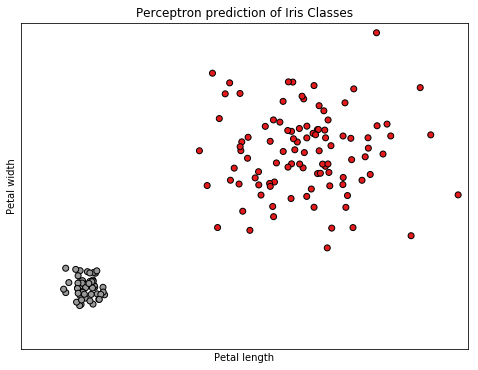

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(random_all[:,0], random_all[:,1], c=y_pred, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Perceptron prediction of Iris Classes')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()